In [2]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import pandas as pd
import glob
import pickle
import numpy as np

In [3]:
homedir = 'c:/users/marianne/documents/CSSLdata'
os.chdir(homedir)
files = glob.glob('*.csv')
datakeys = ['Date', 'Air Temp Max (C)', 'Air Temp Min (C)',
       '24-hour Total Precip (mm)', 'Season Total Precip (mm)',
       '% of Precip as Snow', '% of Precip as Rain', 'New Snow (cm)',
       'Season Total Snow (cm)', 'Snowpack depth (cm)',
       'Snow Water Equivalent (cm)', 'Remarks', 'dt']

In [4]:
df = {}
for fn in files:
    data=pd.read_csv(fn)
    data = data.replace('--',np.nan)
    data = data.replace('T',np.nan)
    data.keys = datakeys
    data['dt'] = pd.to_datetime(data['Date'])
    data['Snow Water Equivalent (cm)'] = data['Snow Water Equivalent (cm)'].astype('float')
    year = ''.join(filter(lambda i: i.isdigit(), fn))
    df[year] = data

with open('cssldata.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('cssldata.pickle', 'rb') as handle:
    cssl = pickle.load(handle)

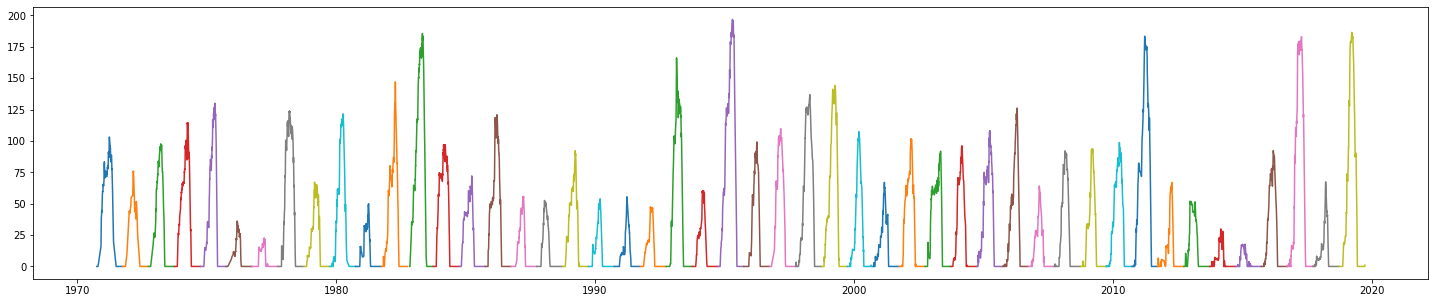

In [5]:
fig,ax = plt.subplots(figsize=(25,5))
for k in cssl.keys():
    data = cssl[k]
    y = pd.Series(data['Snow Water Equivalent (cm)'])
    y.index = index=data['dt']
    y2 = y.interpolate()
    ax.plot(y2)

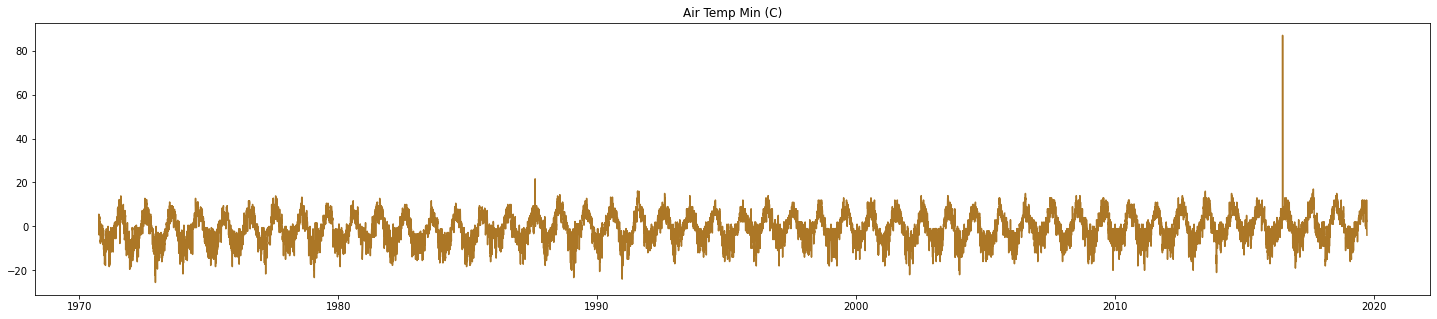

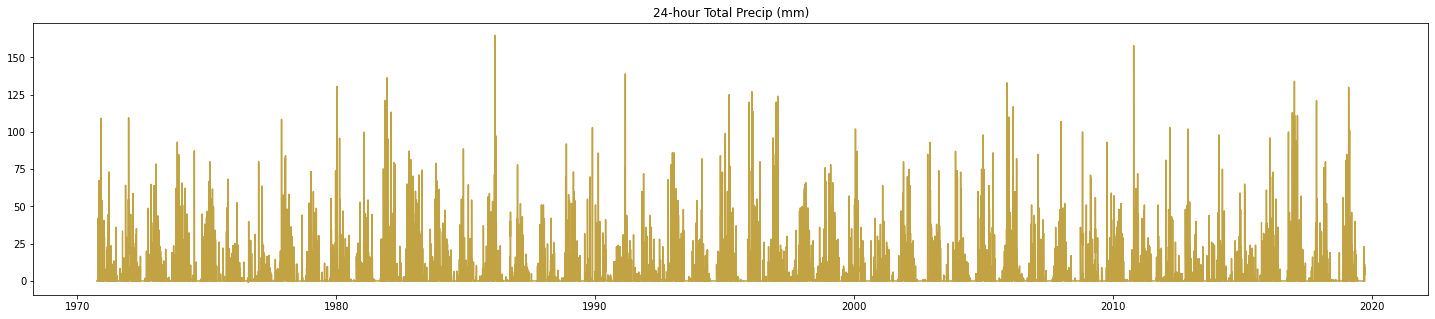

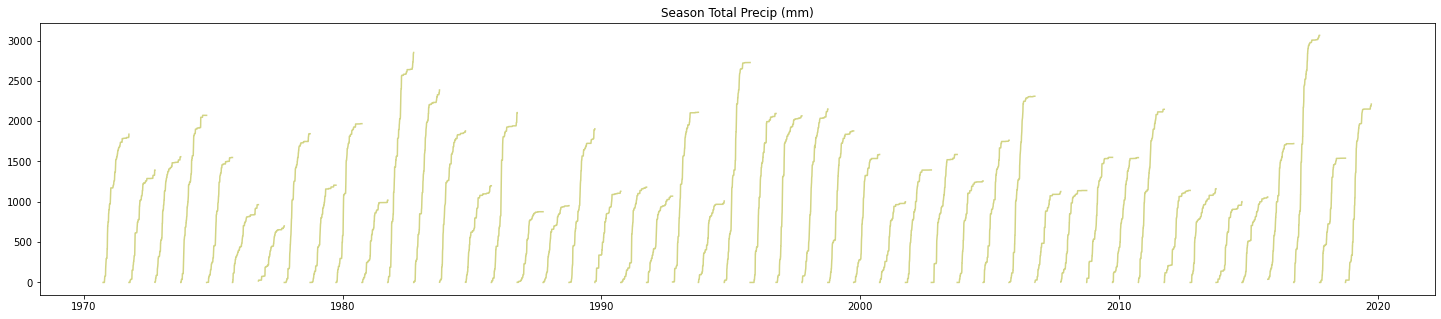

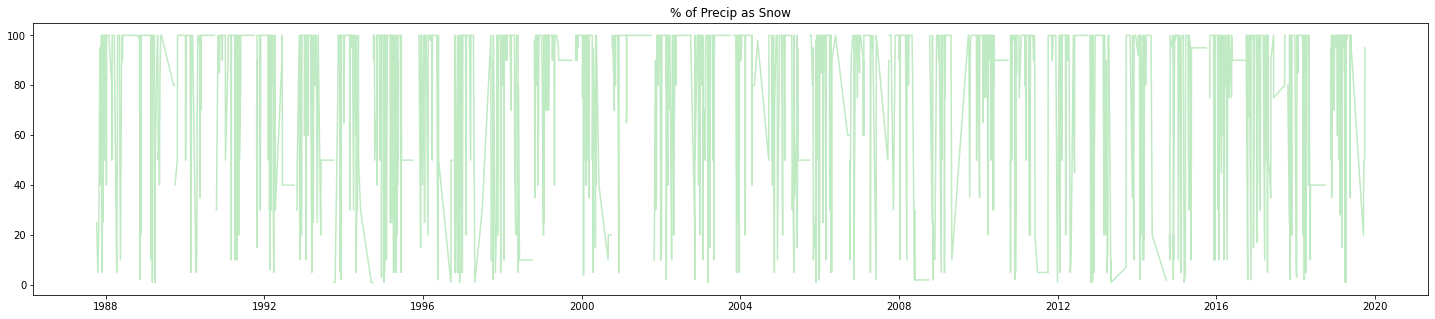

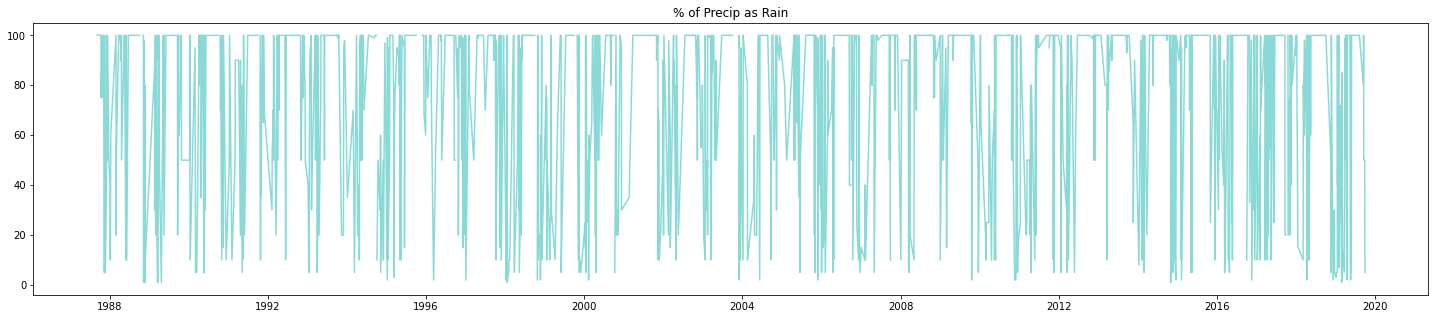

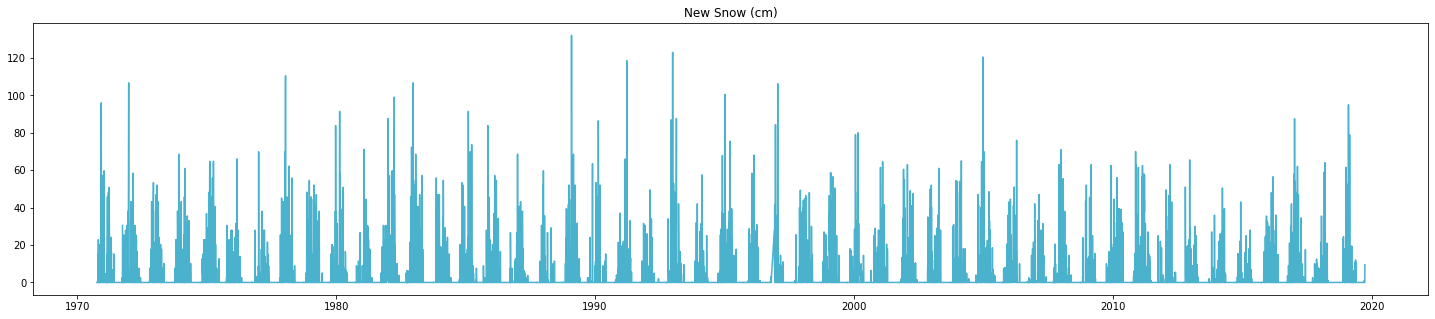

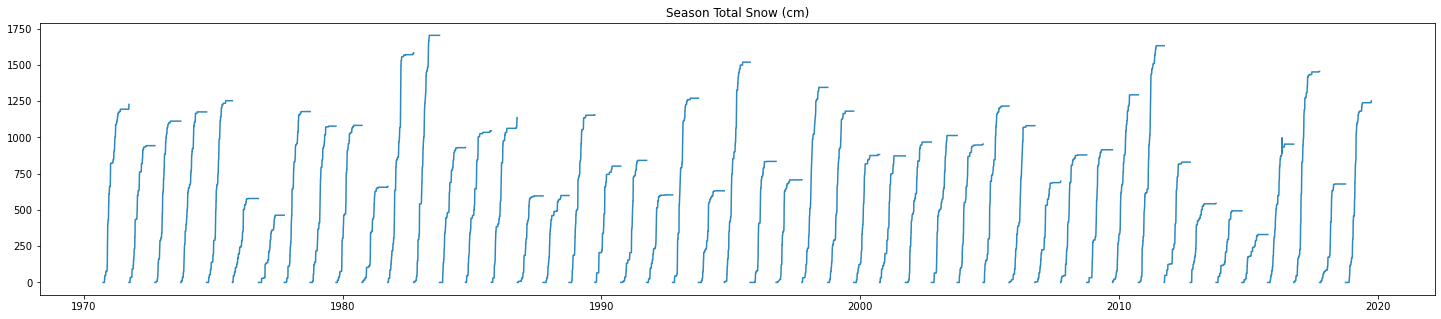

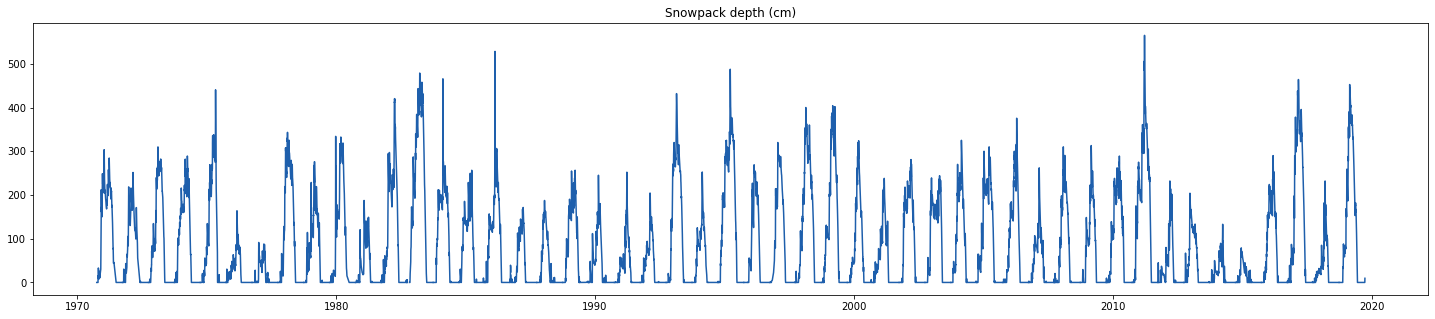

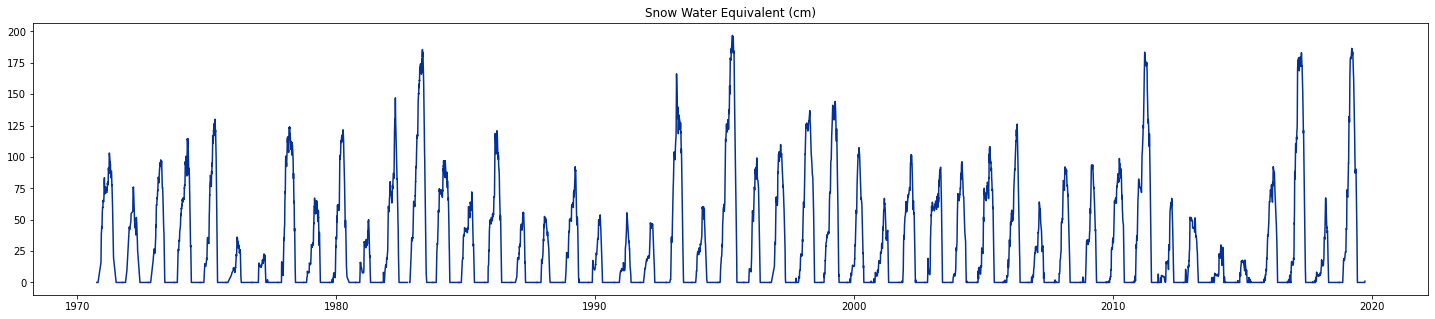

In [6]:
from cmcrameri import cm
cols = cm.roma(np.linspace(0,1,11))
for i in range(2,len(datakeys)-2):
    fig,ax = plt.subplots(figsize=(25,5))
    color = cols[i]
    for k in cssl.keys():
        data = cssl[k]
        try:
            y = pd.Series(data[datakeys[i]].astype('float'))
            y.index = index=data['dt']
            y2 = y.interpolate()
            ax.plot(y2,color=color)
            ax.set_title(datakeys[i])
        except:
            print(datakeys[i],k)
            continue

Text(0.5, 0, 'depth')

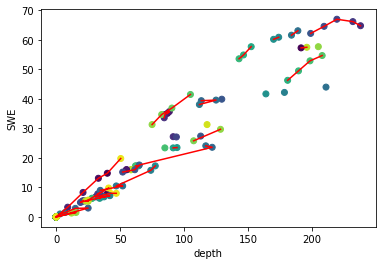

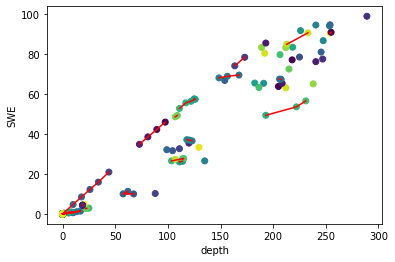

In [23]:
fig,ax=plt.subplots()
for k in ['2001']: # cssl.keys():
    data = cssl[k]
    x = pd.Series(data['Snowpack depth (cm)'].astype('float'))
    y = pd.Series(data['Snow Water Equivalent (cm)'].astype('float'))
    tmp = pd.Series(data['dt'])
    z =  [t.day for t in tmp]
    y.index = index=data['dt']
    ax.scatter(x,y,c= z, label=k)
    ax.plot(x,y,color='r')

# ax.legend()
ax.set_ylabel('SWE')
ax.set_xlabel('depth')

fig,ax=plt.subplots()
for k in ['2010']: # cssl.keys():
    data = cssl[k]
    x = pd.Series(data['Snowpack depth (cm)'].astype('float'))
    y = pd.Series(data['Snow Water Equivalent (cm)'].astype('float'))
    tmp = pd.Series(data['dt'])
    z =  [t.day for t in tmp]
    y.index = index=data['dt']
    ax.scatter(x,y,c= z, label=k)
    ax.plot(x,y,color='r')

# ax.legend()
ax.set_ylabel('SWE')
ax.set_xlabel('depth')


In [ ]:
np.nanmax(cssl['1984']['Snowpack depth (cm)'].astype('float'))

465.582

In [19]:
z

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 1,